Importing Pandas and Numpy

In [1]:
import numpy as np
import pandas as pd
import pprint

In [2]:
url = "./Heart_disease_statlog.csv"
names = ['age', 'sex', 'chest_pain', 'BP', 'cholesterol', 'fasting_bloodsugar', 'rest_ecg', 'max_heartrate', 'exercise_angina', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, header=1,names=names)

In [3]:
df.describe

<bound method NDFrame.describe of      age  sex  chest_pain   BP  cholesterol  fasting_bloodsugar  rest_ecg  \
0     67    0           2  115          564                   0         2   
1     57    1           1  124          261                   0         0   
2     64    1           3  128          263                   0         0   
3     74    0           1  120          269                   0         2   
4     65    1           3  120          177                   0         0   
..   ...  ...         ...  ...          ...                 ...       ...   
264   52    1           2  172          199                   1         0   
265   44    1           1  120          263                   0         0   
266   56    0           1  140          294                   0         2   
267   57    1           3  140          192                   0         0   
268   67    1           3  160          286                   0         2   

     max_heartrate  exercise_angina  oldp

In [4]:
df.head()

,age,sex,chest_pain,BP,cholesterol,fasting_bloodsugar,rest_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,target
0,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
1,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
2,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
3,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
4,65,1,3,120,177,0,0,140,0,0.4,0,0,3,0


In [5]:
x = df.drop('target',1) #type:ignore
y = df['target']

C:\Users\Kaushik\AppData\Local\Temp\ipykernel_10312\3263182832.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop('target',1) #type:ignore


droppinng the target feature cause it is the one our model need to predict

In [6]:
x

,age,sex,chest_pain,BP,cholesterol,fasting_bloodsugar,rest_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal
0,67,0,2,115,564,0,2,160,0,1.6,1,0,3
1,57,1,1,124,261,0,0,141,0,0.3,0,0,3
2,64,1,3,128,263,0,0,105,1,0.2,1,1,3
3,74,0,1,120,269,0,2,121,1,0.2,0,1,1
4,65,1,3,120,177,0,0,140,0,0.4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52,1,2,172,199,1,0,162,0,0.5,0,0,3
265,44,1,1,120,263,0,0,173,0,0.0,0,0,3
266,56,0,1,140,294,0,2,153,0,1.3,1,0,1
267,57,1,3,140,192,0,0,148,0,0.4,1,0,2


In [7]:
x.shape

(269, 13)

In [8]:
y

0      0
1      1
2      0
3      0
4      0
      ..
264    0
265    0
266    0
267    0
268    1
Name: target, Length: 269, dtype: int64

In [9]:
y.shape

(269,)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [11]:
X_train.shape

(242, 13)

**Data Preprocessing**

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[-1.05213062,  0.65723106,  0.86665919, ...,  0.69346513,
         2.5265664 ,  1.22081463],
       [ 0.4176753 ,  0.65723106, -0.16650103, ...,  0.69346513,
        -0.70281249,  1.22081463],
       [-1.27825461, -1.52153491,  0.86665919, ...,  0.69346513,
        -0.70281249,  1.22081463],
       ...,
       [ 1.32217125, -1.52153491, -2.23282146, ...,  2.32277155,
        -0.70281249, -0.86708036],
       [ 1.32217125,  0.65723106, -1.19966124, ...,  0.69346513,
         2.5265664 ,  0.17686714],
       [ 1.54829524, -1.52153491, -0.16650103, ...,  0.69346513,
        -0.70281249, -0.86708036]])

**Applying various classifiers for obtaining the model**

**1) Random Forest Classifier**

In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set
y_pred = classifier.predict(X_test)


In [15]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1], dtype=int64)

In [16]:
#getting the confussion matrix and calculating the accuracy score of the model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confussion matrix :")
print(cm)
print("Accuracy = "+str(accuracy_score(y_test, y_pred)*100)[0:8] + "%")

Confussion matrix :
[[13  1]
 [ 3 10]]
Accuracy = 85.18518%


**2) Logistic Regression Classifier**

In [17]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1], dtype=int64)

In [19]:
#getting the confussion matrix and calculating the accuracy score of the model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confussion matrix :")
print(cm)
print("Accuracy = "+str(accuracy_score(y_test, y_pred)*100)[0:8] + "%")

Confussion matrix :
[[14  0]
 [ 2 11]]
Accuracy = 92.59259%


**3) SVC classifier**

In [20]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1], dtype=int64)

In [22]:
#getting the confussion matrix and calculating the accuracy score of the model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confussion matrix :")
print(cm)
print("Accuracy = "+str(accuracy_score(y_test, y_pred)*100)[0:8] + "%")

Confussion matrix :
[[14  0]
 [ 1 12]]
Accuracy = 96.29629%


**4) KNN Classifier**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1], dtype=int64)

In [25]:
#getting the confussion matrix and calculating the accuracy score of the model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confussion matrix :")
print(cm)
print("Accuracy = "+str(accuracy_score(y_test, y_pred)*100)[0:8] + "%")

Confussion matrix :
[[14  0]
 [ 1 12]]
Accuracy = 96.29629%


**Plotting Graphs**

In each feature of the dataset every feature is further classified into types based on their values.
Let us classify the features for better pplotting.

In [26]:
df['sex'][df['sex'] == 0] =  'Female'
df['sex'][df['sex'] == 1] = 'Male'

df['chest_pain'][df['chest_pain'] == 0 ] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 1 ] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 2 ] = 'non-typical angina'
df['chest_pain'][df['chest_pain'] == 3 ] = 'asymptomatic'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'Abnormal in ST-T wave'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['slope'][df['slope'] == 0] = 'up sloping'
df['slope'][df['slope'] == 1] = 'flat'
df['slope'][df['slope'] == 2] = 'down sloping'

df['thal'][df['thal'] == 0] = 'NULL'
df['thal'][df['thal'] == 1] = 'normal blood flow'
df['thal'][df['thal'] == 2] = 'fixed defect'
df['thal'][df['thal'] == 3] = 'reversible defect'



C:\Users\Kaushik\AppData\Local\Temp\ipykernel_10312\3134998292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 0] =  'Female'
C:\Users\Kaushik\AppData\Local\Temp\ipykernel_10312\3134998292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain'][df['chest_pain'] == 0 ] = 'typical angina'
C:\Users\Kaushik\AppData\Local\Temp\ipykernel_10312\3134998292.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Checking number of individuals with different features

In [27]:
# number of individuals with different ecg values

df['rest_ecg'].value_counts()

left ventricular hypertrophy    136
normal                          131
Abnormal in ST-T wave             2
Name: rest_ecg, dtype: int64

In [28]:
# number of individuals with different types of chest pain

df['chest_pain'].value_counts()

asymptomatic          128
non-typical angina     79
atypical angina        42
typical angina         20
Name: chest_pain, dtype: int64

In [29]:
# number of individuals with thalassemia disorder in different conditions

df['thal'].value_counts()

normal blood flow    151
reversible defect    104
fixed defect          14
Name: thal, dtype: int64

**Importing packages for plotting**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: ylabel='target'>

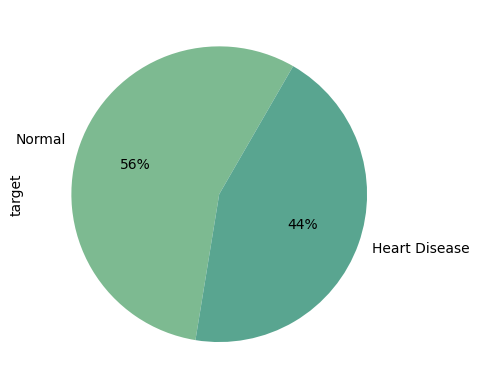

In [31]:
# number of individuals with and without heart disease

df['target'].value_counts().plot.pie( x ="Heart disease" ,y ='no.of patients', autopct = "%1.0f%%",labels=["Normal","Heart Disease"], startangle = 60,colors = sns.color_palette("crest"))

<BarContainer object of 269 artists>

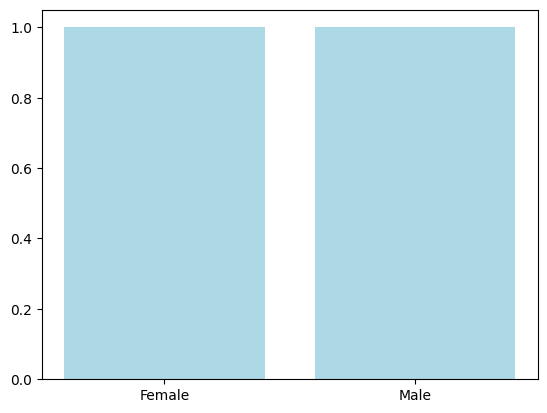

In [32]:
# plotting a bar graph for male and female 

plt.bar(df['sex'],df['target'],color='lightblue')

<BarContainer object of 269 artists>

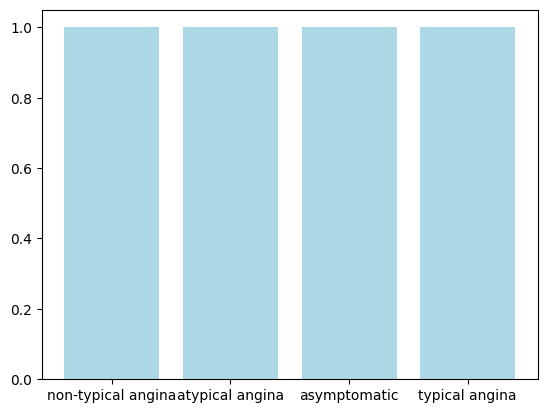

In [33]:
# plotting bar graph for knowing individuals with differenet chest pains

plt.bar(df['chest_pain'],df['target'],color='lightblue')

<BarContainer object of 269 artists>

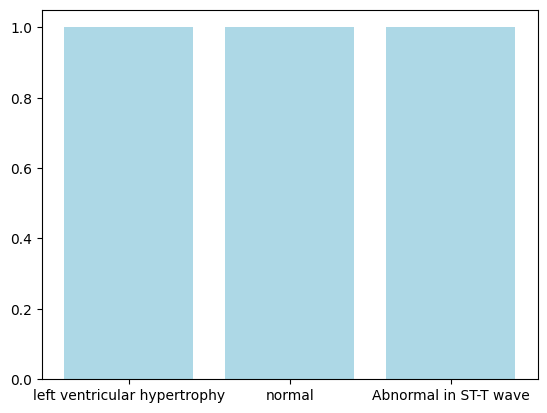

In [34]:
# plotting bar graph for knowing indiaviduas with differenet ecg levels while resting

plt.bar(df['rest_ecg'],df['target'],color='lightblue')

Graphs for comparision of features

Text(0, 0.5, 'Age')

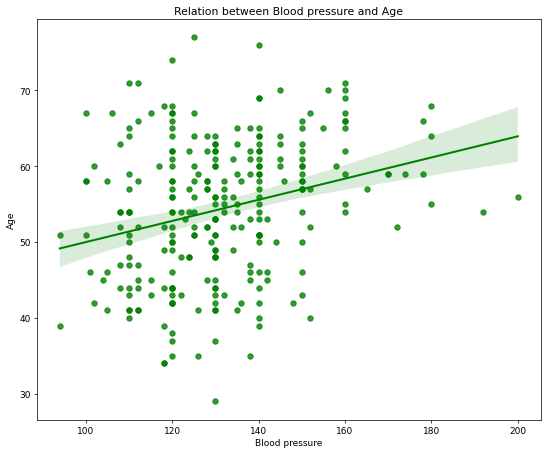

In [35]:
# regression plot indicating the BP for different age groups

plt.figure(figsize=(10,8),dpi=65)
sns.regplot(data=df,x='BP',y='age',color='g',marker='o')
plt.title("Relation between Blood pressure and Age")
plt.xlabel("Blood pressure")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

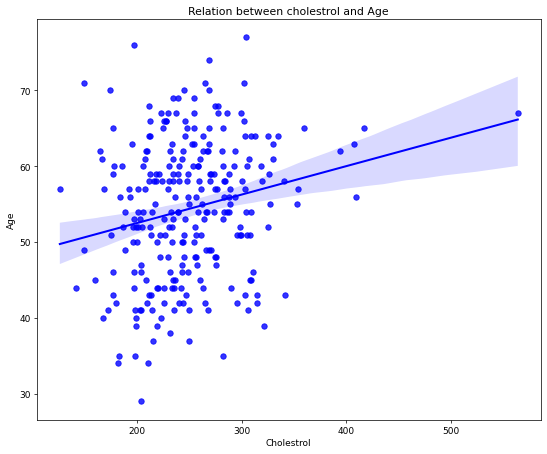

In [36]:
# regression plot indicating the Cholesterol levels for different age groups

plt.figure(figsize=(10,8),dpi=65)
sns.regplot(data=df,x='cholesterol',y='age',color='b',marker='o')
plt.title("Relation between cholestrol and Age")
plt.xlabel("Cholestrol")
plt.ylabel("Age")

<AxesSubplot: xlabel='BP', ylabel='cholesterol'>

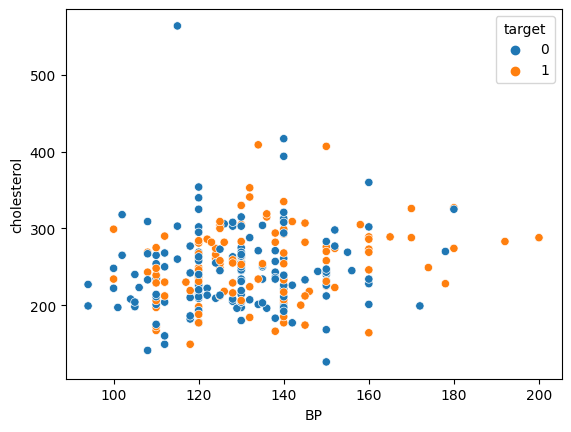

In [37]:
# scatter plot of Blood pressure and cholesterol for individuals with and without heart disease 

sns.scatterplot(x = 'BP', y = 'cholesterol', hue = 'target', data = df)

<AxesSubplot: xlabel='BP', ylabel='Count'>

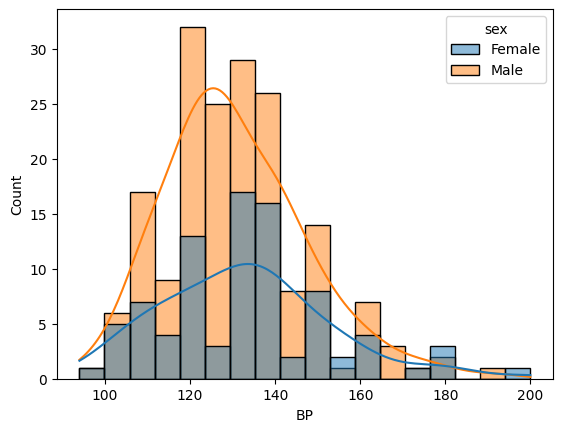

In [38]:
# relation between Blood pressure and Sex of the individual

sns.histplot(data=df,x='BP',kde=True,hue='sex')

<AxesSubplot: xlabel='cholesterol', ylabel='Count'>

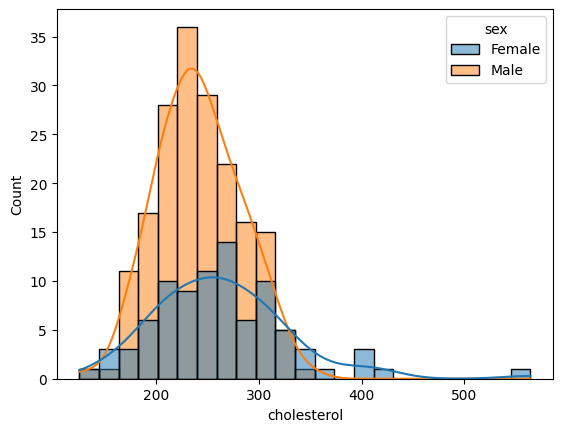

In [39]:
# relation between Cholesterol level and Sex of the individual

sns.histplot(data=df,x='cholesterol',kde=True,hue='sex')